In [48]:
# TASK 1: Create Target Variable Y
# Load the dataset
import pandas as pd
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Create Y from 'Class' column
Y = data['Class'].to_numpy()


In [49]:
# TASK 2: Standardize Feature Data X
from sklearn import preprocessing

# Load the features dataset
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

# Standardize X
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)


In [50]:
# TASK 3: Split the Data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(Y_test.shape)  # Should output: (18,)


(18,)


In [51]:
# TASK 4: Logistic Regression with GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C':[0.01, 0.1, 1], 'penalty':['l2'], 'solver':['lbfgs']}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)


tuned hyperparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


Test Accuracy: 0.8333333333333334


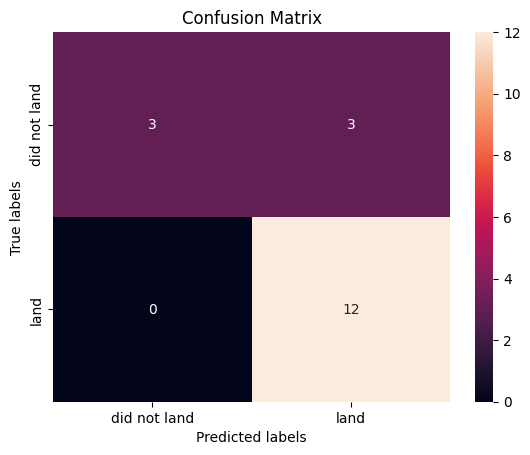

In [52]:
# TASK 5: Logistic Regression Accuracy on Test Set + Confusion Matrix
yhat = logreg_cv.predict(X_test)
print("Test Accuracy:", logreg_cv.score(X_test, Y_test))

# Plot confusion matrix
def plot_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['did not land', 'land']) 
    ax.yaxis.set_ticklabels(['did not land', 'land']) 
    plt.show()

plot_confusion_matrix(Y_test, yhat)


In [34]:
# TASK 6: Support Vector Machine (SVM)
import numpy as np

from sklearn.svm import SVC

parameters = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)


tuned hyperparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


Test Accuracy: 0.8333333333333334


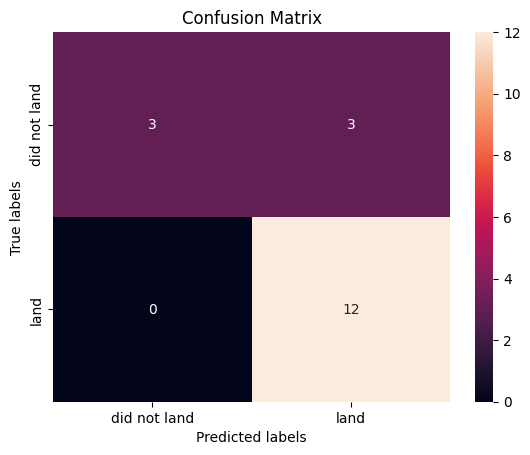

In [35]:
# Task 7: SVM Test Accuracy + Confusion Matrix
yhat = svm_cv.predict(X_test)
print("Test Accuracy:", svm_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test, yhat)


In [36]:
# TASK 8: Decision Tree
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1, 10)],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)


tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8767857142857143


Test Accuracy: 0.6666666666666666


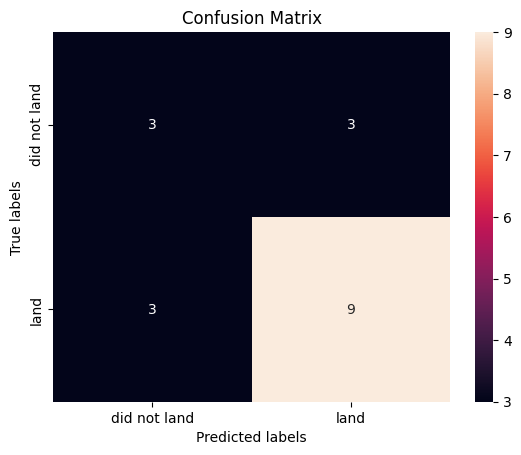

In [37]:
#TASK 9: Decision Tree Test Accuracy + Confusion Matrix
yhat = tree_cv.predict(X_test)
print("Test Accuracy:", tree_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test, yhat)


In [38]:
#TASK 10: k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

parameters = {
    'n_neighbors': list(range(1, 11)),
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

print("tuned hyperparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)


tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


Test Accuracy: 0.8333333333333334


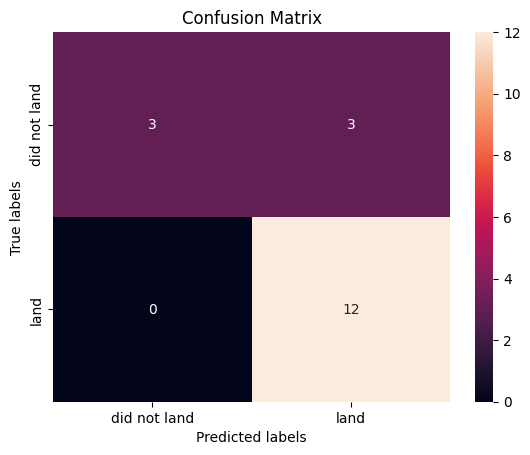

In [39]:
#TASK 11: KNN Test Accuracy + Confusion Matrix
yhat = knn_cv.predict(X_test)
print("Test Accuracy:", knn_cv.score(X_test, Y_test))
plot_confusion_matrix(Y_test, yhat)



In [40]:
# TASK 12: Compare All Models
print("Logistic Regression Test Accuracy:", logreg_cv.score(X_test, Y_test))
print("SVM Test Accuracy:", svm_cv.score(X_test, Y_test))
print("Decision Tree Test Accuracy:", tree_cv.score(X_test, Y_test))
print("KNN Test Accuracy:", knn_cv.score(X_test, Y_test))


Logistic Regression Test Accuracy: 0.8333333333333334
SVM Test Accuracy: 0.8333333333333334
Decision Tree Test Accuracy: 0.6666666666666666
KNN Test Accuracy: 0.8333333333333334
